# Phase 3: Machine Learning

In this notebook, we will:

- Load the cleaned dataset
- Split the data into train and test sets
- Train and evaluate baseline models
- (Optionally) Improve model performance


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
os.makedirs("images", exist_ok=True)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix



In [9]:
df = pd.read_csv("../data/inputs/cleaned/cleaned_credit_data.csv")
df.head()

,limit_bal,sex,education,marriage,age,pay_delay_sep,pay_delay_aug,pay_delay_jul,pay_delay_jun,pay_delay_may,...,payment_amount_may,payment_amount_apr,default,total_bill_amount,total_payment_amount,payment_to_bill_ratio,payment_delay_count,high_utilization,avg_payment_delay,has_ever_paid_on_time
0,20000.0,female,university,married,24,2,2,-1,-1,-2,...,0.0,0.0,1,7704.0,689.0,0.089434,2,0,-0.333333,1
1,120000.0,female,university,single,26,-1,2,0,0,0,...,0.0,2000.0,1,17077.0,5000.0,0.292791,2,0,0.500000,1
2,90000.0,female,university,single,34,0,0,0,0,0,...,1000.0,5000.0,0,101653.0,11018.0,0.108388,0,0,0.000000,0
3,50000.0,female,university,married,37,0,0,0,0,0,...,1069.0,1000.0,0,231334.0,8388.0,0.036259,0,1,0.000000,0
4,50000.0,male,university,married,57,-1,0,-1,0,0,...,689.0,679.0,0,109339.0,59049.0,0.540054,0,0,-0.333333,1


## Train/Test Split
### Why we do this
Splitting the dataset into training and test sets is essential in machine learning.
It helps us train the model on one part of the data (training set) and test it on unseen data (test set) to evaluate how well the model generalizes.
 - We use an 80/20 split:
 - 80% of the data is used to train the model.
 - 20% is kept aside to test the model's performance later.

To make sure the proportion of defaulters and non-defaulters remains the same in both sets, we use stratified sampling.

In [26]:
# One-hot encode categorical variables
x_encoded = pd.get_dummies(x, columns=["sex", "education", "marriage"], drop_first=True)

# Define features (X) and target (y)
x = df.drop(columns=["default"])
y = df["default"]

# Split the dataset (80% train, 20% test)
x_train, x_test, y_train, y_test = train_test_split(
    x_encoded, y, test_size=0.2, random_state=42, stratify=y
)

# Check the sizes
print("Encoded features shape:", x_encoded.shape)
print("Training set size:", x_train.shape)
print("Test set size:", x_test.shape)


Encoded features shape: (30000, 34)
Training set size: (24000, 34)
Test set size: (6000, 34)


## Outcome
- Training set size: (24000, 30)
- Test set size: (6000, 30)
- Class distribution preserved using stratified sampling.

We’ll train baseline models to get a first impression of how well machine learning can predict credit default using our cleaned and engineered dataset.
We'll:
- Train simple classification models (Logistic Regression, Decision Tree, K-Nearest Neighbors)
- Evaluate them using basic metrics: accuracy, precision, recall, F1-score, and confusion matrix
- Compare performance to choose a baseline model for future steps




Training Logistic Regression

Training Decision Tree

Training K-Nearest Neighbors
              precision    recall  f1-score   support

           0       0.80      0.92      0.85      4673
           1       0.38      0.17      0.23      1327

    accuracy                           0.76      6000
   macro avg       0.59      0.55      0.54      6000
weighted avg       0.70      0.76      0.72      6000



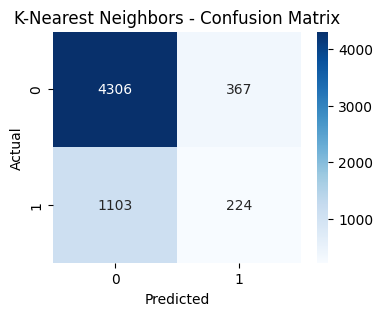

In [27]:
# Define models 
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier()
}

# Train and evaluate each model
for name, model in models.items():
    print(f"\nTraining {name}")
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

# Classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title(f"{name} - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.savefig(f"../assets/plots/{name}_confusion_matrix.png")
plt.show()

## Baseline Model Results

We trained three simple classification models to predict credit card default:

- **Logistic Regression**
- **Decision Tree**
- **K-Nearest Neighbors**

### Key Findings:

- All models show relatively high overall accuracy (~76-78%).
- However, **recall for the positive class (defaulters)** is low, especially for KNN (17%).
- This suggests the models are **biased toward predicting non-default**, likely due to class imbalance.



In [28]:
# Models with class_weight='balanced'
balanced_models = {
    "Logistic Regression (Balanced)": LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42),
    "Decision Tree (Balanced)": DecisionTreeClassifier(class_weight='balanced', random_state=42),
}

# Train and evaluate balanced models
for name, model in balanced_models.items():
    print(f"\nTraining {name}")
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(f"\nClassification report for {name}:\n")
    print(classification_report(y_test, y_pred))


Training Logistic Regression (Balanced)

Classification report for Logistic Regression (Balanced):

              precision    recall  f1-score   support

           0       0.86      0.50      0.63      4673
           1       0.29      0.70      0.41      1327

    accuracy                           0.55      6000
   macro avg       0.57      0.60      0.52      6000
weighted avg       0.73      0.55      0.58      6000


Training Decision Tree (Balanced)

Classification report for Decision Tree (Balanced):

              precision    recall  f1-score   support

           0       0.83      0.82      0.83      4673
           1       0.39      0.42      0.41      1327

    accuracy                           0.73      6000
   macro avg       0.61      0.62      0.62      6000
weighted avg       0.74      0.73      0.73      6000

